# What about the Attrition?

*An analysis based on IBM HR Dataset - Provided by kaggle.com*

<img src='https://www.pointillist.com/wp-content/uploads/2017/11/Running-4-the-Exit-2-844x422-800x400.png'>

Organizations are maded of people. Inside the company, we can find individuals with different backgrounds, experiences and  with different objetives. 
Sometimes, what the individual wants for him or her career, is aligned with the organization objetives. In that case, the individual is able to pursuit his personal objetive, while following the organization one.
In other times, the organizational objetive is not aligned with the individual one, so he or she may enter in an internal conflict.

Since organizations are **people** working following a main objetive, is not crazy to affirm that they are the **most valuable** asset. People working in different possitions, add value while working, and sometimes they are the visible face of the bussiness.

When someone enter in a company, is needed to spend time in a good onboarding, trainings, and development of him or her skills. It's a big investment, and sometimes is not seen as that. Because of that, when an employee decide to **quit**, it's a **double loss**: social and economical... so it is really important to understand the main causes, and think in solutions to avoid lose our best employees.

The **new paradigm** in organizations, include people from different ages and way of thinking working side by side, new knowledge and technology, new ways of work (presential, remote, etc), and a fast enviroment never seen before.
If you want, I invite you to follow me in this trip, triying to get the first insights about **"Why people left their jobs?"**, and think in ways to don't lose our main value.

## Content Table
* [1.0 Preliminar Work](#Preliminar)
    * [1.1 Importing Libraries](#Libraries)
    * [1.2 Loading Dataset](#load)
* [2.0 First Look at the Data](#first_look)
    * [2.1 Attrition, Job Position and Education](#education)
    * [2.2 Attrition and Temporal Features](#time)
    * [2.3 What about generations?](#generations)
    * [2.4 Gender Analysis](#gender)
    * [2.5 Attrition and Job Features](#job)
* [3.0 Cluster Analysis](#cluster)
* [4.0 Predictive Model](#model)
* [5.0 Oversampling](#oversampling)

## 1.0 Preliminar Work <a class="anchor" id="Preliminar"></a>
------------------------------------------------


### 1.1 Importing Libraries <a class="anchor" id="Libraries"></a>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 1.2 Loading the Dataset <a class="anchor" id="load"></a>


In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
print("A first aproach to our dataset \n")
display(df.head(2), df.describe().transpose(), df.columns)


A first aproach to our dataset 



Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  

[2 rows x 35 columns]

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

As we could see, our dataset has <mark style="background-color: lightblue"> 1470 </mark>rows , <mark style="background-color: lightblue">35 </mark>columns, and <mark style="background-color: lightblue">0</mark> null values

## 2.0 First look at the Data <a class="anchor" id="first_look"></a>
-------------------------------------------

Before to develop our model, we a
re going to make a **descriptive analysis** trying to get insights about the main causes of attrition in our personal

### 2.1 Attrition, Job Position and Education <a class="anchor" id="education"></a>

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



''

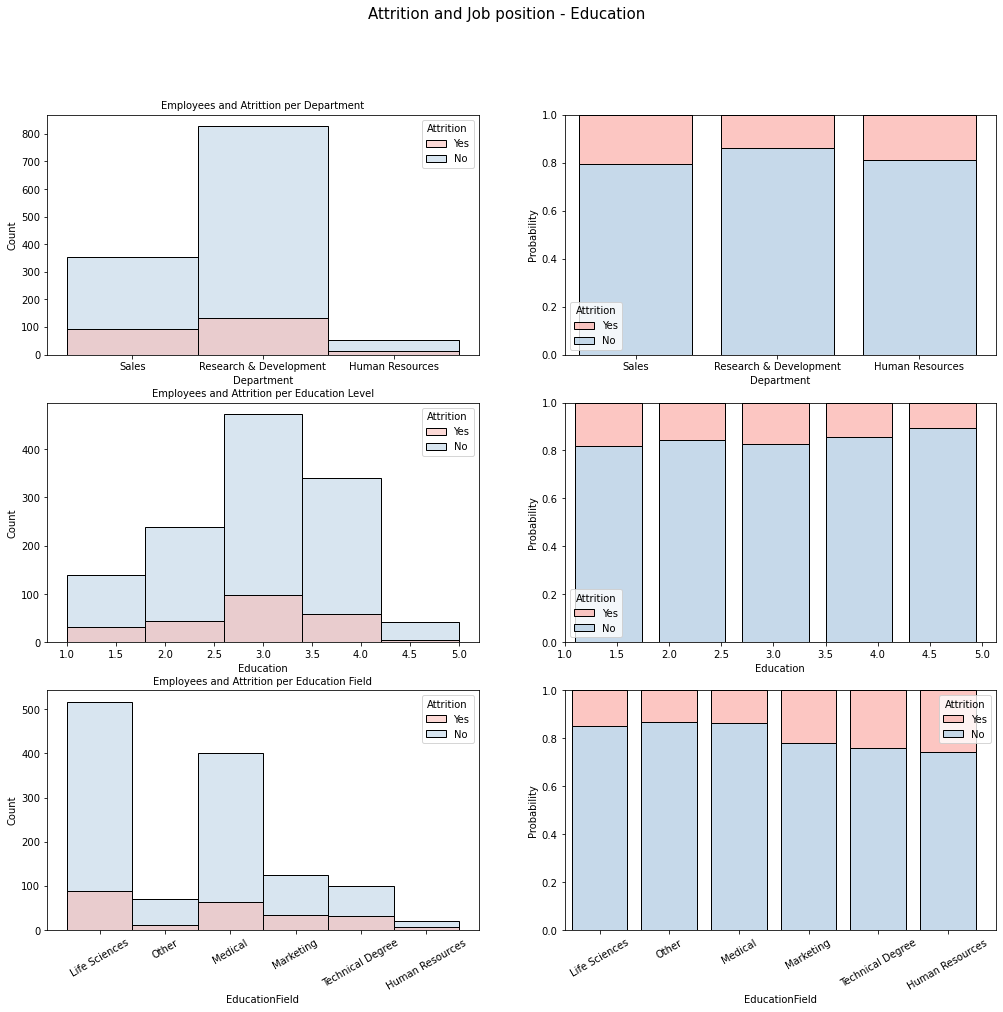

In [4]:
fig, axis=plt.subplots(3,2,figsize=(17,15))
plt.suptitle('Attrition and Job position - Education',size=15)

sns.histplot(x=df.Department, hue=df.Attrition, ax=axis[0,0],palette="Pastel1")
axis[0,0].set_title('Employees and Atrittion per Department', size=10)
sns.histplot(df, x=df.Department, hue=df.Attrition, ax=axis[0,1],palette="Pastel1", stat="probability", multiple="fill", shrink=.8)

sns.histplot(x=df.Education, hue=df.Attrition, ax=axis[1,0],bins=5,palette="Pastel1")
axis[1,0].set_title('Employees and Attrition per Education Level', size=10)
sns.histplot(df, x=df.Education, hue=df.Attrition, ax=axis[1,1],bins=5,palette="Pastel1", stat="probability", multiple="fill", shrink=.8)

sns.histplot(x=df.EducationField, hue=df.Attrition, ax=axis[2,0],palette="Pastel1")
axis[2,0].set_title('Employees and Attrition per Education Field', size=10)
axis[2,0].set_xticklabels(labels=list(df.EducationField.unique()),rotation=30)
sns.histplot(df, x=df.EducationField, hue=df.Attrition, ax=axis[2,1],palette="Pastel1", stat="probability", multiple="fill", shrink=.8)
axis[2,1].set_xticklabels(labels=list(df.EducationField.unique()),rotation=30)
;


As we can see in the first subplots, in our dataset we have more people related with the **Research and Development Area**, with mid-high levels of educations, and they are from fields related with **Life Sciences and Medicine**.
But when we analyze the proportion of attrition in each category, we discover that the education level is not so important as the Education field or the Area. More people working in Sales or Human Resouces showed attrition, for example.
But as we know that we have less observations in the categories with high proportion of attrition, <mark style="background-color: lightblue">we are not going to take fast conclussions</mark>.

### 2.2 Attrition and temporal features <a class="anchor" id="time"></a>

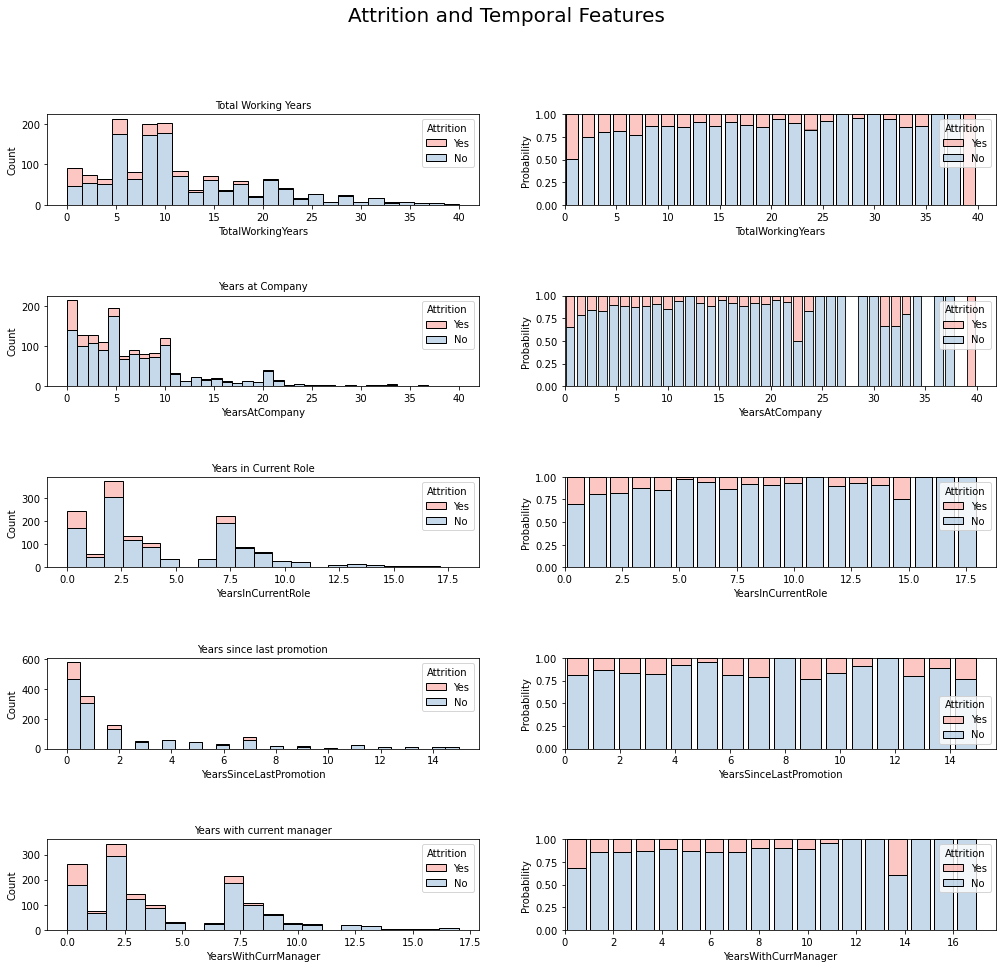

In [5]:
fig, axis=plt.subplots(5,2,figsize=(17,15))
plt.suptitle('Attrition and Temporal Features',fontsize=20)
sns.histplot(x=df.TotalWorkingYears, hue=df.Attrition, ax=axis[0,0],palette='Pastel1',multiple="stack")
axis[0,0].set_title('Total Working Years', size=10)
sns.histplot(df, x=df.TotalWorkingYears, hue=df.Attrition, ax=axis[0,1],palette="Pastel1", stat="probability", multiple="fill", shrink=.8)

sns.histplot(x=df.YearsAtCompany, hue=df.Attrition, ax=axis[1,0],palette='Pastel1',multiple="stack")
axis[1,0].set_title('Years at Company', size=10)
sns.histplot(df, x=df.YearsAtCompany, hue=df.Attrition, ax=axis[1,1],palette="Pastel1", stat="probability", multiple="fill", shrink=.8)

sns.histplot(x=df.YearsInCurrentRole, hue=df.Attrition, ax=axis[2,0],palette='Pastel1',multiple="stack")
axis[2,0].set_title('Years in Current Role', size=10)
sns.histplot(df, x=df.YearsInCurrentRole, hue=df.Attrition, ax=axis[2,1],palette="Pastel1", stat="probability", multiple="fill", shrink=.8, bins=19)

sns.histplot(x=df.YearsSinceLastPromotion, hue=df.Attrition, ax=axis[3,0],palette='Pastel1',multiple="stack")
axis[3,0].set_title('Years since last promotion', size=10)
sns.histplot(df, x=df.YearsSinceLastPromotion, hue=df.Attrition, ax=axis[3,1],palette="Pastel1", stat="probability", multiple="fill", shrink=.8,bins=16)

sns.histplot(x=df.YearsWithCurrManager, hue=df.Attrition, ax=axis[4,0],palette='Pastel1',multiple="stack")
axis[4,0].set_title('Years with current manager', size=10)
sns.histplot(df, x=df.YearsWithCurrManager, hue=df.Attrition, ax=axis[4,1],palette="Pastel1", stat="probability", multiple="fill", shrink=.8,bins=18)

plt.subplots_adjust(hspace=1)

Comparing the attrition with temporal features, we could notice:

**Total Working Years**: as we can imagine, we have 100% of attrition at the level of 40 total working years, maybe beacuse at that time, people start to retire.
But, we can also notice an intersting number of people who quit between the 0 and 5 total working years. Maybe we are talking about young proffesionals, who wants to adquire experience in different companies.

### 2.3 What about generations? <a class="anchor" id="generations"></a>

Which Generation are You?


|Generation Name | Births Start | Births End	| Youngest Age | Oldest Age |
| :-: | :-: | :-: | :-: | :-: |
|The Silent Generation | 1928 | 1945 | 71 | 88 |
|Baby Boomer | 1946 | 1964 | 52 | 70 |
|Generation X | 1965 | 1980 | 36 | 51 |
|Millenials | 1981 | 1999 | 17 | 35 |
|Gen Z | 2000 | 2020 | 0 | 16 |

(*age if still alive on 2016, year when the data was taken)

In [6]:
# We will build a new feature, which classifies the age in the main "Generations" accepted by theory.
df['Generation'] = df.Age.apply(lambda x: 'Millenials' if (x>=17) and (x<36) else('Generation X' if (x>=36) and (x<52) else ('Baby Boomers' if (x>=52) and (x<71) else ('Silent Generation' if (x>=71) and (x<89) else x))))

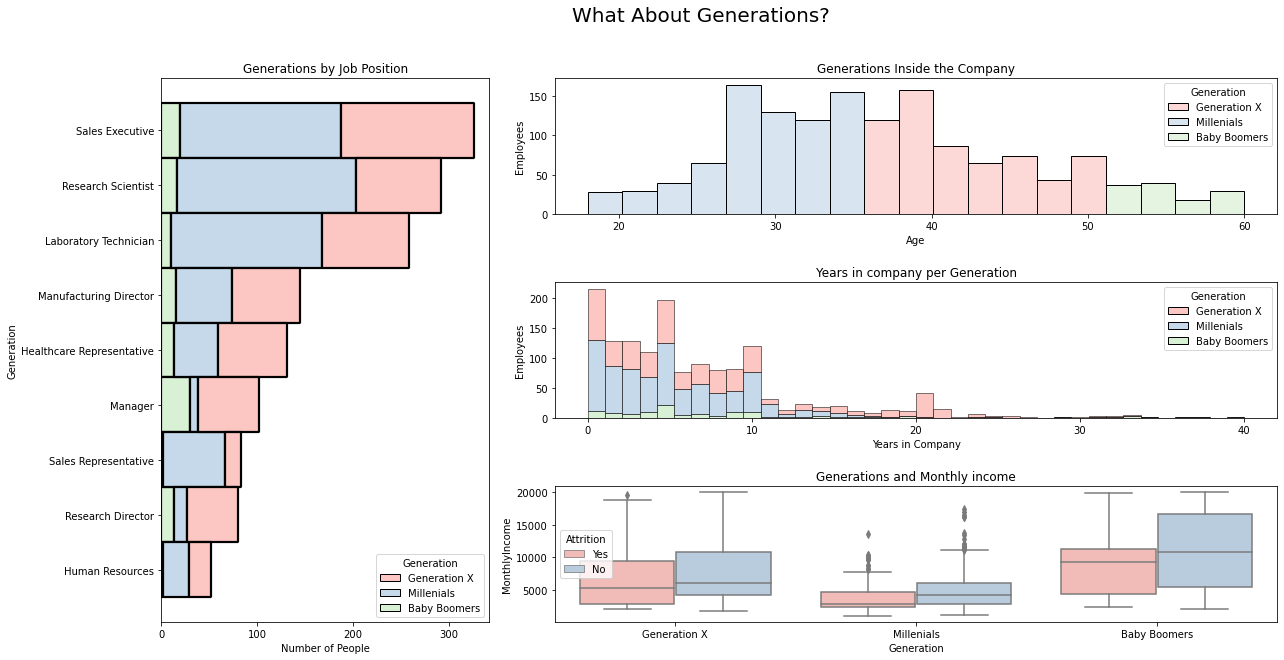

In [7]:
fig = plt.figure(1)
plt.suptitle('What About Generations?',fontsize=20)
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot
plt.subplot2grid((3,3), (0,0), colspan=1, rowspan=3)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Generations by Job Position')
plt.xlabel('Number of People')
plt.ylabel('Generation')
sns.histplot(y=df.JobRole, hue=df.Generation, palette='Pastel1',multiple="stack")

# small subplot 1
plt.subplot2grid((3,3), (0,1),colspan=2)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Generations Inside the Company')
plt.xlabel('Age')
plt.ylabel('Employees')
sns.histplot(x=df.Age, hue=df.Generation,palette='Pastel1')

# small subplot 2
plt.subplot2grid((3,3), (1,1),colspan=2)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Years in company per Generation')
plt.xlabel('Years in Company')
plt.ylabel('Employees')
sns.histplot(x=df.YearsAtCompany, hue=df.Generation, palette='Pastel1',multiple="stack")

# small subplot 3
plt.subplot2grid((3,3), (2,1),colspan=2)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Generations and Monthly income')
plt.xlabel('Generations')
plt.ylabel('Income')
sns.boxplot(x=df.Generation, y=df.MonthlyIncome, hue=df.Attrition,palette='Pastel1')

# fit subplots and save fig

fig.set_size_inches(w=20,h=10)
plt.subplots_adjust(hspace=.5)
plt.show()

### 2.4 Gender Analysis <a class="anchor" id="gender"></a>

I will like to think that genre is not an important feature while we are studying the labor force (since all of us are equal). But the reality is we still having a long road to walk in the route of equality, so is important to compare an analyse some features between genres, to find inequities and develop plans to solve it.
Some questions that I thought:

¿How is the labor force distributed?

¿How is the distribution of income and job positions?

¿Are there differences between men and women related with attrition?

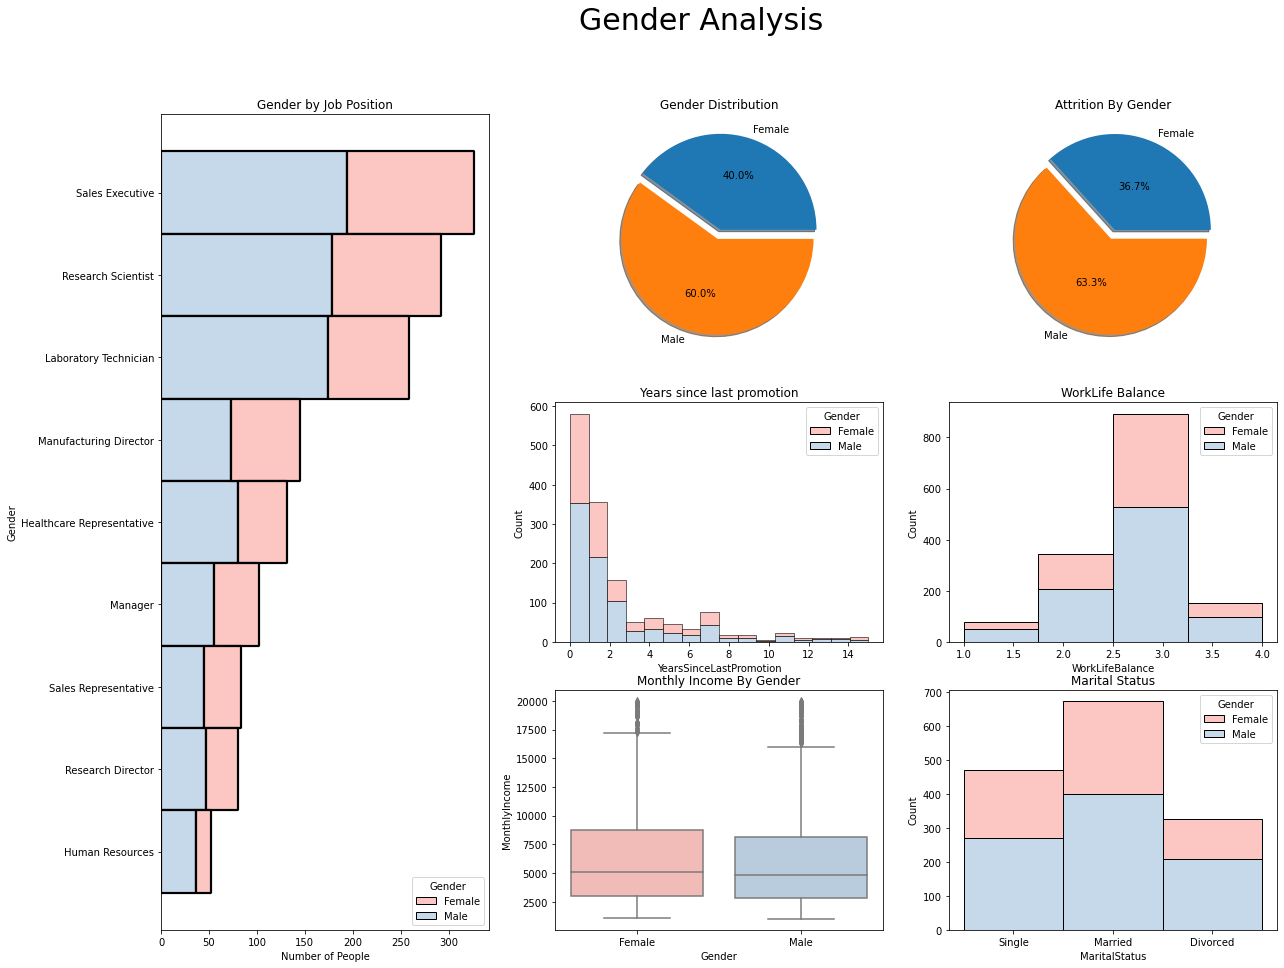

In [8]:
fig = plt.figure(1)
plt.suptitle('Gender Analysis',fontsize=30,x = .5)
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot
plt.subplot2grid((3,3), (0,0), colspan=1, rowspan=3)
plt.title('Gender by Job Position')
plt.xlabel('Number of People')
plt.ylabel('Gender')
sns.histplot(y=df.JobRole, hue=df.Gender, palette='Pastel1',multiple="stack")

plt.subplot2grid((3,3), (0,1),colspan=1)
plt.title('Gender Distribution')
labels = list(df.groupby("Gender")["EmployeeCount"].sum().keys())
plt.pie(x=df.groupby("Gender")["EmployeeCount"].sum(), 
        autopct="%.1f%%",  labels=labels,explode=[0.05]*2, shadow=True)

plt.subplot2grid((3,3), (0,2),colspan=1)
plt.title('Attrition By Gender')
labels = list(df.loc[df['Attrition']=='Yes'].groupby("Gender")["EmployeeCount"].sum().keys())
plt.pie(x=df.loc[df['Attrition']=='Yes'].groupby("Gender")["EmployeeCount"].sum(), 
        autopct="%.1f%%",  labels=labels, radius=1,pctdistance=0.5, explode=[0.05]*2, shadow=True)

plt.subplot2grid((3,3), (2,1),colspan=1)
plt.title('Monthly Income By Gender')
sns.boxplot(data=df,x='Gender', y='MonthlyIncome', palette='Pastel1')

plt.subplot2grid((3,3),(1,1),colspan=1)
plt.title('Years since last promotion')
sns.histplot(x=df.YearsSinceLastPromotion,hue=df.Gender, palette='Pastel1', multiple='stack',bins=16)

plt.subplot2grid((3,3), (1,2), colspan=1)
plt.title('WorkLife Balance')
sns.histplot(x=df.WorkLifeBalance,hue=df.Gender, palette='Pastel1', bins=4,multiple='stack')

plt.subplot2grid((3,3),(2,2),colspan=1)
plt.title('Marital Status')
sns.histplot(x=df.MaritalStatus, hue=df.Gender, palette='Pastel1',multiple='stack')

fig.set_size_inches(w=20,h=15)
plt.subplots_adjust(hspace=.2)
plt.show()

After the analysis, we didn't see diferences between gender if we talk about income, job posittions or attrition. Instead of that, we see more men in positions like Laboratory, Sales, Human Resources and Research.

Something to take note, is that the proportion of women is less than men, in the total of employees. We don't have more information to make conclussions about that.

### 2.5 Attrition and Job features <a class="anchor" id="job"></a>

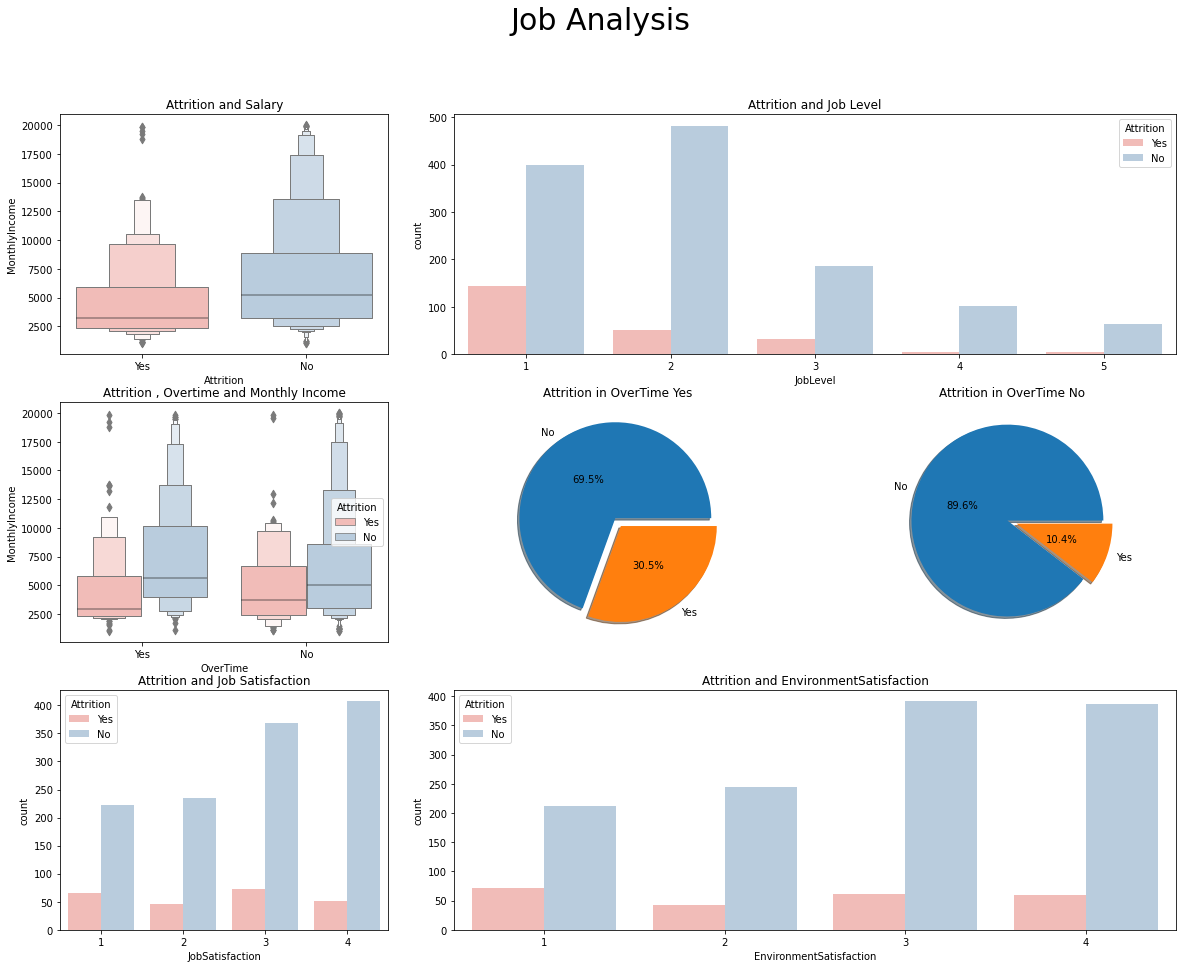

In [9]:
fig = plt.figure(1)
plt.suptitle('Job Analysis',fontsize=30,x = .5)
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot
plt.subplot2grid((3,3), (0,0), colspan=1)
plt.title('Attrition and Salary')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
sns.boxenplot(y=df.MonthlyIncome,x=df.Attrition, palette='Pastel1')

plt.subplot2grid((3,3), (0,1), colspan=2)
plt.title('Attrition and Job Level')
plt.xlabel('Job Level')
plt.ylabel('People')
sns.countplot(data=df, x='JobLevel', hue='Attrition',palette='Pastel1')

plt.subplot2grid((3,3), (1,0), colspan=1)
plt.title('Attrition , Overtime and Monthly Income')
plt.xlabel('Overtime')
plt.ylabel('People')
sns.boxenplot(data=df, x='OverTime',y='MonthlyIncome', hue='Attrition',palette='Pastel1')

plt.subplot2grid((3,3), (1,1),colspan=1)
plt.title('Attrition in OverTime Yes')
labels = list(df.loc[df['OverTime']=='Yes'].groupby("Attrition")["EmployeeCount"].sum().keys())
plt.pie(x=df.loc[df['OverTime']=='Yes'].groupby("Attrition")["EmployeeCount"].sum(), 
        autopct="%.1f%%",  labels=labels, radius=1,pctdistance=0.5, explode=[0.05]*2, shadow=True)

plt.subplot2grid((3,3), (1,2),colspan=1)
plt.title('Attrition in OverTime No')
labels = list(df.loc[df['OverTime']=='No'].groupby("Attrition")["EmployeeCount"].sum().keys())
plt.pie(x=df.loc[df['OverTime']=='No'].groupby("Attrition")["EmployeeCount"].sum(), 
        autopct="%.1f%%",  labels=labels, radius=1,pctdistance=0.5, explode=[0.05]*2, shadow=True)

plt.subplot2grid((3,3), (2,0), colspan=1)
plt.title('Attrition and Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('People')
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition',palette='Pastel1')

plt.subplot2grid((3,3), (2,1), colspan=2)
plt.title('Attrition and EnvironmentSatisfaction')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('People')
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition',palette='Pastel1')



fig.set_size_inches(w=20,h=15)
plt.subplots_adjust(hspace=.2)
plt.show()

## 3.0 Cluster Analysis<a class="anchor" id="cluster"></a>
--------

With the objetive of getting more insights about our staff, we are going to develop a no supervized ML Model, with Kmeans.
We want to analyze if there are common patters between employees and Age, Income, and Career.
Before to train the model, we created a new feature related with the time since last promotion, as a ratio of total years at company.

In [10]:
df['LastPromotion_ratio']=  (df['YearsSinceLastPromotion'] / df['YearsAtCompany']).round(2)
       

In [11]:
df=df.fillna(value=0)

In [12]:
X_cluster=df[['MonthlyIncome','Age','LastPromotion_ratio']]
scaler=StandardScaler()
X_cluster_scaled=scaler.fit_transform(X_cluster);


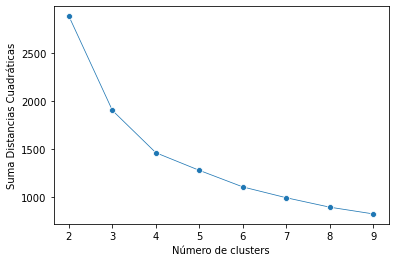

In [13]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_cluster_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');    

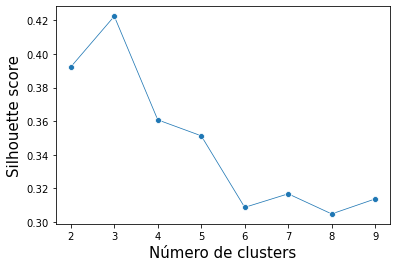

In [14]:
from sklearn.metrics import silhouette_score,silhouette_samples

sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_cluster_scaled)
    score=silhouette_score(X_cluster_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

After the analysis with Silhouette Score and Square Distances, we decided to choose 3 clusters as the optimum to train our KMeans Model.

In [15]:
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10
kmeans.fit(X_cluster_scaled)

KMeans(n_clusters=3, random_state=0)

In [16]:
labels=kmeans.labels_

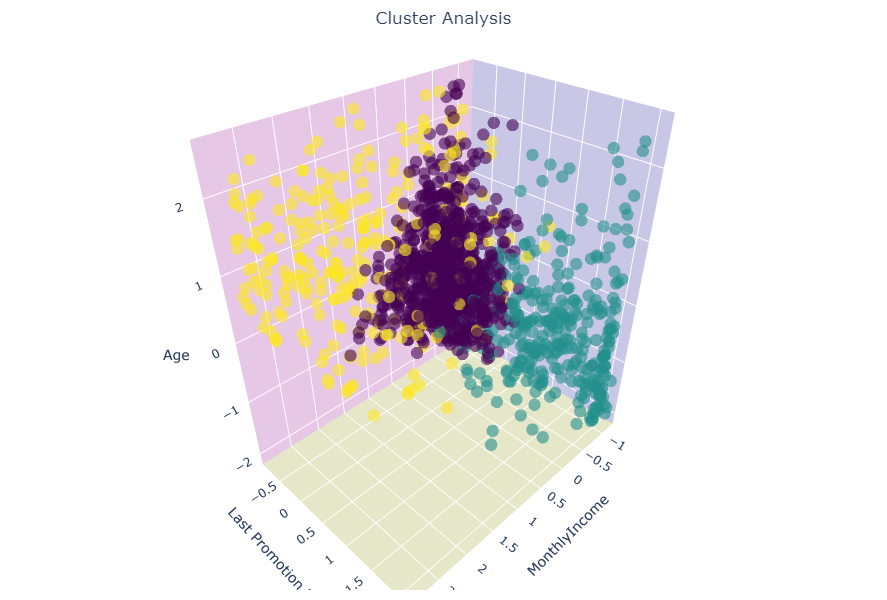

In [17]:
fig = go.Figure(data=[go.Scatter3d(x=X_cluster_scaled[:,0],y=X_cluster_scaled[:,2],z=X_cluster_scaled[:,1],mode='markers',
                                   marker = dict( size = 7, 
                                                 color = labels, 
                                               colorscale ='Viridis', 
                                               opacity = 0.6
                                                ))])
fig.update_layout(title=dict(text="Cluster Analysis", x=0.5,y=.98),
                   scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",
                         title='MonthlyIncome',),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",
                        title='Last Promotion Ratio',),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",
                        title='Age',),),
                    width=600,
                    height=600,
                    margin=dict(
                    r=0, l=0,
                    b=10, t=30)
                  )
fig.show()

As we can see in the graph, we have three different clusters, represented by:


|Cluster|Color|Meaning|
| :-: | :-: | :-: |
|Cluster 1| Purple| People from different ages, with low monthly income and a low promotion ratio*.|
|Cluster 2| Green | People from different ages, with low montlhy income and high promotion ratio.|
|Cluster 3| Yellow| People with higher age, good income and different promotion ratios.|

<mark style="background-color: lightblue">Cluster 1</mark>, could be related with people who is building their careers. So, they have benn promoted recently, but they still having low income. With that cluster, we may focus in the satisfaction with the new rol, and with the new knowledge.

<mark style="background-color: lightblue">Cluster 2</mark>, keeps people with low income and with a high promotion ratio, what it means that they hadn't been promoted since a long time. We must pay attention here, and take notes about their feelings related with the enviroment, company, etc. because they may be unmotivated or not happy with their situation.

<mark style="background-color: lightblue">Cluster 3</mark>, with people from higher ages and good salary. They could be managers or directors, with a lot of expertice and knowledge about the bussines. The risk here, is to keep them motivated with new challanges, because if they left we may lost a lot of gained knowledge.

*A low promotion ratio implies that someone has been promoted recently.

## Predictive Model <a class="anchor" id="model"></a>
-----------

In [18]:
### We will create a copy of our main DF, just in case
df_model = df.copy()

In [19]:
# We drop the features less important for our analysis
df_model = df_model.drop(['EmployeeNumber','HourlyRate',
                          'MonthlyRate','DailyRate','Over18','StandardHours',
                          'Generation','EmployeeCount'], axis=1)

In [20]:
# We convert the feature attrition to our target.
df_model['Attrition'] = df_model.Attrition.apply(lambda x: 0 if x=='No' else 1)

#### Generation of Dummies Variables

In [21]:
df_model = pd.get_dummies(df_model, drop_first=True)

In [22]:
# A quick look to our new variables
df_model.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'LastPromotion_ratio', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scient

In [23]:
# We create the array of target, and our dataset of features
X_model= df_model.drop(['Attrition'], axis=1)
y_model= df_model.Attrition

Split the dataset between train and test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.30, random_state=42, stratify=y_model)

In [25]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [26]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [27]:
# we create a function to evaluate our model
def model_performance(model, name, X, y, cv):
    s = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
    print("Performance of {}:\t{:0.3} ± {:0.3}".format( \
        name, s.mean().round(3), s.std().round(3)))

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)

model_performance(dt,"Tree base", X_train, y_train, cv)

Performance of Tree base:	0.822 ± 0.024


In [29]:
ab = AdaBoostClassifier(base_estimator=dt, n_estimators=500,random_state=1)
model_performance(ab, "AdaBoostClassifier",  X_train, y_train, cv)

Performance of AdaBoostClassifier:	0.823 ± 0.02


In [30]:
gb = GradientBoostingClassifier()
model_performance(gb, "GradientBoostingClassifier", X_train, y_train, cv)

Performance of GradientBoostingClassifier:	0.878 ± 0.009


In [31]:
from sklearn.model_selection import GridSearchCV

params_ab = {"n_estimators": [500,1000],
          "learning_rate":[0.01, 0.1],
        "base_estimator__max_depth": [1, 2, 3]}

grid_ab = GridSearchCV(AdaBoostClassifier(base_estimator=dt,random_state=1), 
                       param_grid=params_ab, cv=cv, verbose=1, n_jobs=3)


In [32]:
grid_ab.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   34.4s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:   51.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                                          random_state=1),
             n_jobs=3,
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [33]:
model_performance(grid_ab.best_estimator_,  "AdaBoostClassifier + GS", X_train, y_train, cv)

Performance of AdaBoostClassifier + GS:	0.89 ± 0.015


In [34]:
params_gb = {'n_estimators':[500, 1000] , 
             'learning_rate':[0.001, 0.001, 0.1],
            'max_depth' : [1, 2, 3, 4]}

grid_gb = GridSearchCV(gb, param_grid=params_gb, cv=cv, verbose=1, n_jobs=3)

In [35]:
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   23.8s
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.001, 0.001, 0.1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [36]:
model_performance(grid_gb.best_estimator_,  "AdaBoostClassifier + GS", X_train, y_train, cv)

Performance of AdaBoostClassifier + GS:	0.894 ± 0.008


## ROC Curve

In [37]:
from sklearn.metrics import roc_auc_score


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

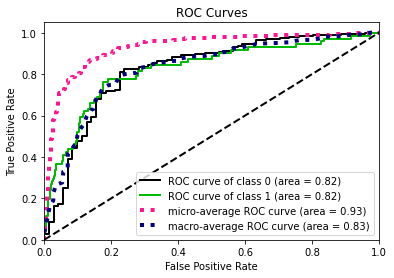

In [38]:
from scikitplot.metrics import plot_roc
plot_roc(y_test,grid_gb.predict_proba(X_test))

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

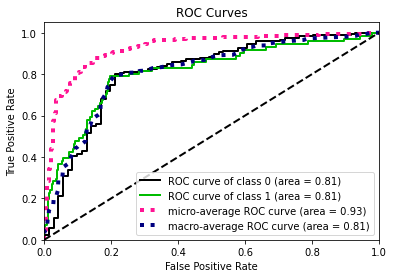

In [39]:
plot_roc(y_test,grid_ab.predict_proba(X_test))

In [40]:
xgb_auc = roc_auc_score(y_test,grid_gb.predict(X_test))
print("AUC Value is: ", xgb_auc)

AUC Value is:  0.6457556147696992


In [41]:
xab_auc = roc_auc_score(y_test,grid_ab.predict(X_test))
print("AUC Value for Xab is: ", xab_auc)

AUC Value for Xab is:  0.6232775028549676


## Feature Importance

In [42]:
model = grid_gb.best_estimator_
model

GradientBoostingClassifier(max_depth=1, n_estimators=1000)

In [43]:
importances = model.feature_importances_
importances

array([0.0639713 , 0.02163864, 0.00090262, 0.0447746 , 0.03806017,
       0.00651905, 0.02160625, 0.13150642, 0.04837369, 0.01076129,
       0.        , 0.02668875, 0.08784269, 0.12575216, 0.00571354,
       0.02977514, 0.00988442, 0.00232288, 0.00735697, 0.07605352,
       0.00965079, 0.02501849, 0.        , 0.03804742, 0.0007528 ,
       0.        , 0.00246285, 0.        , 0.        , 0.00343254,
       0.00170247, 0.        , 0.02046473, 0.        , 0.        ,
       0.00467729, 0.01028978, 0.00058435, 0.0007223 , 0.        ,
       0.        , 0.12269005])

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.



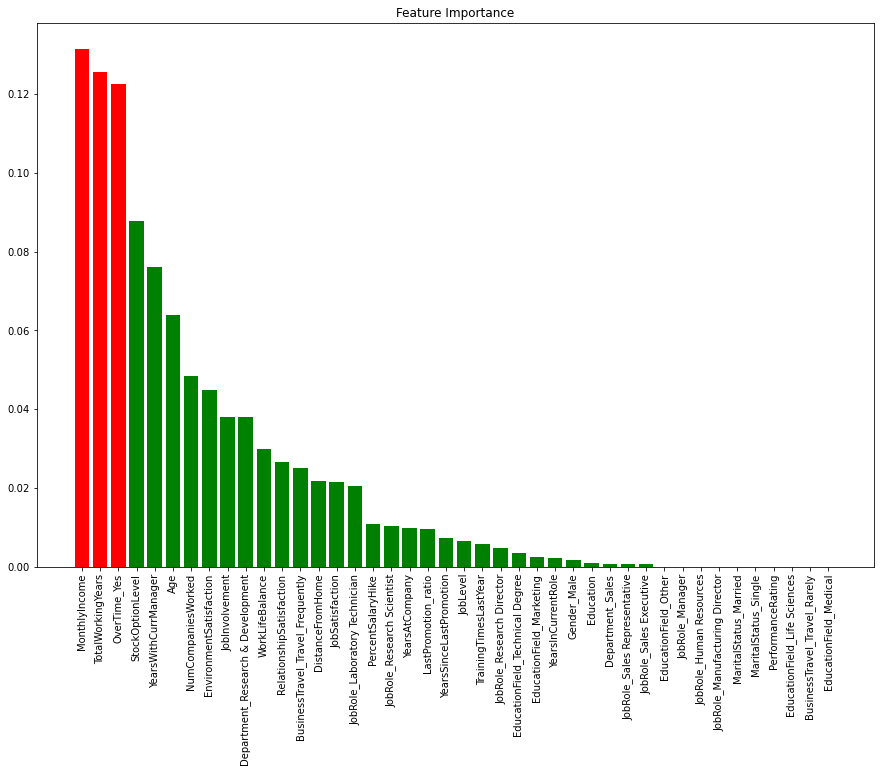

In [44]:
index = np.argsort(importances)[::-1]
names = X_model.columns[index]

plt.figure(figsize=(15,10))

plt.title("Feature Importance")


plt.bar(range(X_model.shape[1]), importances[index],color='rrrggggggggggggggggggggggggggggggggggggggg')

plt.xticks(range(X_model.shape[1]), names, rotation=90)

# Show plot
plt.show()

## LightGBM Model

In [45]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier()

In [46]:
from sklearn.model_selection import GridSearchCV
params = {  
    "n_estimators": [50,100,500],      # Number of boosted trees to fit.
    "max_depth": [1,2,3,4],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1],      # Boosting learning rate (xgb’s “eta”)
}

In [47]:
grid_lgb = GridSearchCV(model_lgb, param_grid=params, cv=cv, verbose=1, n_jobs=-1)

In [48]:
grid_lgb.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 500]},
             verbose=1)

In [49]:
model_performance(grid_lgb.best_estimator_,"Light GBM", X_train, y_train, cv)


Performance of Light GBM:	0.894 ± 0.014


In [50]:
lgbm_auc = roc_auc_score(y_test,grid_lgb.predict(X_test))
print("AUC value is: ", lgbm_auc)

AUC value is:  0.6105443471640655


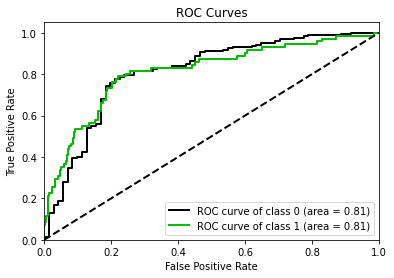

In [51]:
plot_roc(y_test,grid_lgb.predict_proba(X_test), plot_micro = False, plot_macro= False);

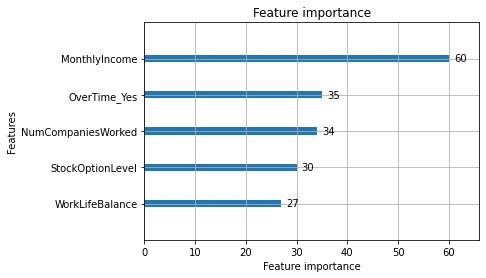

In [52]:
lgb.plot_importance(grid_lgb.best_estimator_, max_num_features=5);

## Confussion Matrix

In [53]:
modelgb = grid_gb.best_estimator_

In [54]:
y_pred_gb=modelgb.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix GB Model')

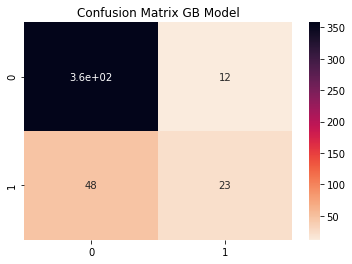

In [55]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_mat, annot=True, cmap='rocket_r')
plt.title(label='Confusion Matrix GB Model')

In [56]:
modelab = grid_ab.best_estimator_

In [57]:
y_pred_ab=modelab.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix AB Model')

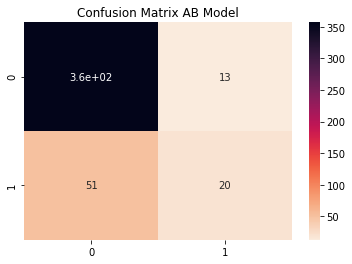

In [58]:
conf_mat = confusion_matrix(y_test, y_pred_ab)
sns.heatmap(conf_mat, annot=True, cmap='rocket_r')
plt.title(label='Confusion Matrix AB Model')

## 5.0 Oversampling <a class="anchor" id="oversampling"></a>
----------------------------------------------

In [59]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('training set:')
print(y_train_os.value_counts())

print('\ntest set:')
print(y_test.value_counts())

training set:
1    863
0    863
Name: Attrition, dtype: int64

test set:
0    370
1     71
Name: Attrition, dtype: int64


In [60]:
gb_os = GradientBoostingClassifier()
model_performance(gb_os, "GradientBoostingClassifier", X_train_os, y_train_os, cv)

Performance of GradientBoostingClassifier:	0.91 ± 0.008


In [61]:
params_gb_os = {'n_estimators':[500, 1000] , 
             'learning_rate':[0.001, 0.001, 0.1],
            'max_depth' : [1, 2, 3, 4]}

grid_gb_os = GridSearchCV(gb_os, param_grid=params_gb_os, cv=cv, verbose=1, n_jobs=3)

In [62]:
grid_gb_os.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   24.5s
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.001, 0.001, 0.1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [63]:
model_performance(grid_gb_os.best_estimator_, "GradientBoostingClassifier", X_train_os, y_train_os, cv)

Performance of GradientBoostingClassifier:	0.849 ± 0.01


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

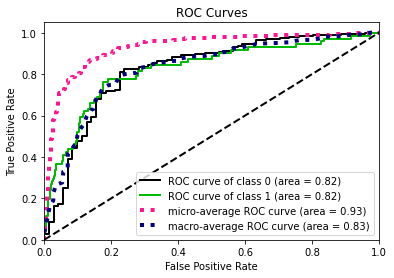

In [64]:
plot_roc(y_test,grid_gb_os.predict_proba(X_test))

In [65]:
model_os = grid_gb_os.best_estimator_
model_os

GradientBoostingClassifier(max_depth=1, n_estimators=1000)

In [66]:
importances_os = model_os.feature_importances_
importances_os

array([0.0639713 , 0.02163864, 0.00090262, 0.0447746 , 0.03806017,
       0.00651905, 0.02160625, 0.13150642, 0.04837369, 0.01076129,
       0.        , 0.02668875, 0.08784269, 0.12575216, 0.00571354,
       0.02977514, 0.00988442, 0.00232288, 0.00735697, 0.07605352,
       0.00965079, 0.02501849, 0.        , 0.03804742, 0.0007528 ,
       0.        , 0.00246285, 0.        , 0.        , 0.00343254,
       0.00170247, 0.        , 0.02046473, 0.        , 0.        ,
       0.00467729, 0.01028978, 0.00058435, 0.0007223 , 0.        ,
       0.        , 0.12269005])

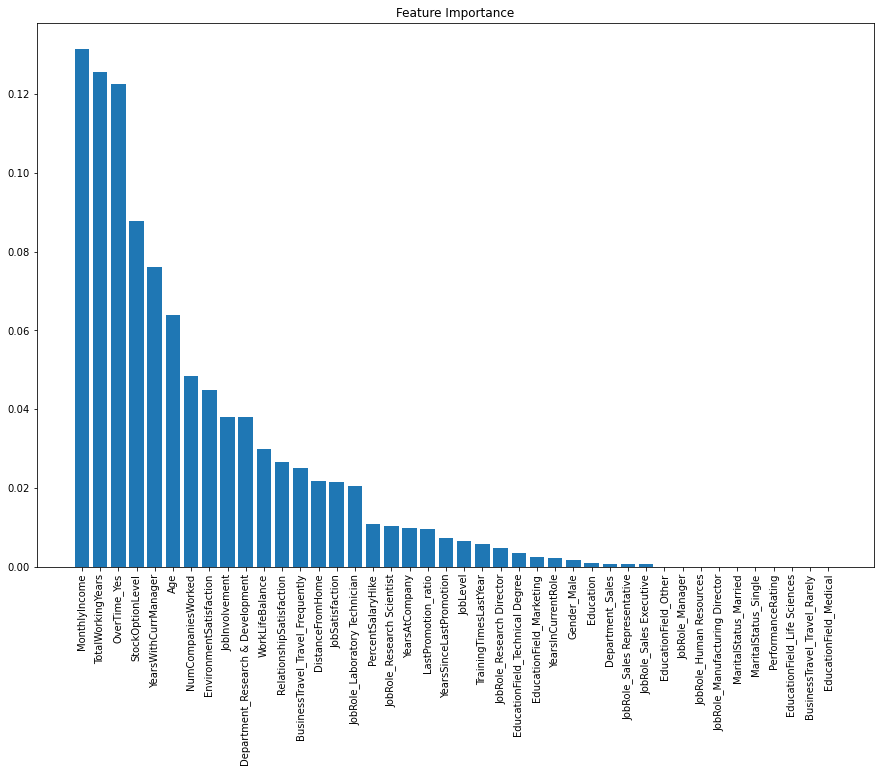

In [67]:
# Recordamos que argsort nos devuelve un vector con indices del vector original 
# tal que este quede reordenado de mayor a menor. 
# https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

# creamos una variable que tenga los indices indicando los valores de mayor a menor
indices = np.argsort(importances_os)[::-1]

# con dicha variable realizamos fancy indexing de manera de ordenar los labels del eje x.
names = X_model.columns[indices]

# Creamos el plot
plt.figure(figsize=(15,10))

# Creamos plot title
plt.title("Feature Importance")

# Agregamos las barras
plt.bar(range(X_model.shape[1]), importances_os[indices])

# Agregamos los feature names 
plt.xticks(range(X_model.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [68]:
y_pred_gb_os = grid_gb_os.best_estimator_.predict(X_test)

In [69]:
conf_mat = confusion_matrix(y_test, y_pred_gb_os)
conf_mat

array([[358,  12],
       [ 48,  23]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test, y_pred_gb_os))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       370
           1       0.66      0.32      0.43        71

    accuracy                           0.86       441
   macro avg       0.77      0.65      0.68       441
weighted avg       0.85      0.86      0.84       441



# To be continued